# Advance Data Manipulation

- Group By: split-apply-combine
- Merge, join, and concatenate
- Reshaping and Pivot Tables

In [1]:
## We load the libraries

import pandas as pd
import seaborn as sns
import numpy as np

## we load the data

titanic_df = sns.load_dataset("titanic")
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## Group By: split-apply-combine

In [2]:
## Group by columns
grouped = titanic_df.groupby(["survived", "sex"])

In [3]:
# We sum by groups
grouped.sum()

pclass       age  sibsp  parch        fare  adult_male  alone
survived sex                                                                  
0        female     231   1603.00     98     84   1864.9752         0.0   27.0
         male      1159  11382.50    206     97  10277.7447       449.0  347.0
1        female     447   5683.00    120    120  12101.6876         0.0   99.0
         male       220   2536.67     42     39   4449.5418        88.0   64.0

In [4]:
# Or we count by groups
grouped.count()

pclass  age  sibsp  parch  fare  embarked  class  who  \
survived sex                                                             
0        female      81   64     81     81    81        81     81   81   
         male       468  360    468    468   468       468    468  468   
1        female     233  197    233    233   233       231    233  233   
         male       109   93    109    109   109       109    109  109   

                 adult_male  deck  embark_town  alive  alone  
survived sex                                                  
0        female          81     6           81     81     81  
         male           468    61          468    468    468  
1        female         233    91          231    233    233  
         male           109    45          109    109    109

In [5]:
# or we look at the first row
grouped.first()

pclass   age  sibsp  parch     fare embarked   class    who  \
survived sex                                                                   
0        female       3  14.0      0      0   7.8542        S   Third  child   
         male         3  22.0      1      0   7.2500        S   Third    man   
1        female       1  38.0      1      0  71.2833        C   First  woman   
         male         2  34.0      0      0  13.0000        S  Second    man   

                 adult_male deck  embark_town alive  alone  
survived sex                                                
0        female       False    C  Southampton    no   True  
         male          True    E  Southampton    no  False  
1        female       False    C    Cherbourg   yes  False  
         male          True    D  Southampton   yes   True

In [6]:
# We can look at the index of the different groups
grouped.groups

{(0,
  'female'): Int64Index([ 14,  18,  24,  38,  40,  41,  49,  71, 100, 111, 113, 114, 119,
             132, 140, 147, 167, 177, 180, 199, 205, 229, 235, 240, 246, 251,
             254, 264, 276, 293, 297, 312, 357, 362, 374, 396, 402, 404, 409,
             415, 419, 423, 436, 474, 485, 498, 501, 502, 503, 534, 541, 542,
             564, 567, 578, 593, 610, 617, 634, 638, 642, 654, 657, 678, 680,
             702, 729, 736, 767, 772, 792, 799, 807, 813, 816, 852, 854, 863,
             882, 885, 888],
            dtype='int64'),
 (0, 'male'): Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  20,  26,
             ...
             872, 873, 876, 877, 878, 881, 883, 884, 886, 890],
            dtype='int64', length=468),
 (1, 'female'): Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  19,  22,
             ...
             858, 862, 865, 866, 871, 874, 875, 879, 880, 887],
            dtype='int64', length=233),
 (1, 'male'): Int64Index([ 17,  21,  23,  36,  55,  65,  74,  

In [7]:
## Lets create a MultiIndex
titanic_Indexed = titanic_df.set_index(["survived", "sex"])
titanic_Indexed

pclass   age  sibsp  parch      fare embarked   class    who  \
survived sex                                                                    
0        male         3  22.0      1      0    7.2500        S   Third    man   
1        female       1  38.0      1      0   71.2833        C   First  woman   
         female       3  26.0      0      0    7.9250        S   Third  woman   
         female       1  35.0      1      0   53.1000        S   First  woman   
0        male         3  35.0      0      0    8.0500        S   Third    man   
         male         3   NaN      0      0    8.4583        Q   Third    man   
         male         1  54.0      0      0   51.8625        S   First    man   
         male         3   2.0      3      1   21.0750        S   Third  child   
1        female       3  27.0      0      2   11.1333        S   Third  woman   
         female       2  14.0      1      0   30.0708        C  Second  child   
         female       3   4.0      1      1   16.7000        S   Third  child   
         female       1  58.0      0      0   26.5500        S   First  woman   
0        male         3  20.0      0      0    8.0500        S   Third    man   
         male         3  39.0      1      5   31.2750        S   Third    man   
         female       3  14.0      0      0    7.8542        S   Third  child   
1        female       2  55.0      0      0   16.0000        S  Second  woman   
0        male         3   2.0      4      1   29.1250        Q   Third  child   
1        male         2   NaN      0      0   13.0000        S  Second    man   
0        female       3  31.0      1      0   18.0000        S   Third  woman   
1        female       3   NaN      0      0    7.2250        C   Third  woman   
0        male         2  35.0      0      0   26.0000        S  Second    man   
1        male         2  34.0      0      0   13.0000        S  Second    man   
         female       3  15.0      0      0    8.0292        Q   Third  child   
         male         1  28.0      0      0   35.5000        S   First    man   
0        female       3   8.0      3      1   21.0750        S   Third  child   
1        female       3  38.0      1      5   31.3875        S   Third  woman   
0        male         3   NaN      0      0    7.2250        C   Third    man   
         male         1  19.0      3      2  263.0000        S   First    man   
1        female       3   NaN      0      0    7.8792        Q   Third  woman   
0        male         3   NaN      0      0    7.8958        S   Third    man   
...                 ...   ...    ...    ...       ...      ...     ...    ...   
         male         2  21.0      1      0   11.5000        S  Second    man   
1        female       1  48.0      0      0   25.9292        S   First  woman   
0        female       3   NaN      8      2   69.5500        S   Third  woman   
         male         2  24.0      0      0   13.0000        S  Second    man   
1        female       2  42.0      0      0   13.0000        S  Second  woman   
         female       2  27.0      1      0   13.8583        C  Second  woman   
0        male         1  31.0      0      0   50.4958        S   First    man   
         male         3   NaN      0      0    9.5000        S   Third    man   
1        male         3   4.0      1      1   11.1333        S   Third  child   
0        male         3  26.0      0      0    7.8958        S   Third    man   
1        female       1  47.0      1      1   52.5542        S   First  woman   
0        male         1  33.0      0      0    5.0000        S   First    man   
         male         3  47.0      0      0    9.0000        S   Third    man   
1        female       2  28.0      1      0   24.0000        C  Second  woman   
         female       3  15.0      0      0    7.2250        C   Third  child   
0        male         3  20.0      0      0    9.8458        S   Third    man   
         male         3  19.0      0      0    7

In [8]:
# MultiIndex
titanic_Indexed.sort_index(inplace=True)
titanic_Indexed.index

MultiIndex(levels=[[0, 1], ['female', 'male']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
# We can index the rows using tuples
titanic_Indexed.loc[(0,"male")]

pclass   age  sibsp  parch      fare embarked   class    who  \
survived sex                                                                  
0        male       3  22.0      1      0    7.2500        S   Third    man   
         male       3  35.0      0      0    8.0500        S   Third    man   
         male       3   NaN      0      0    8.4583        Q   Third    man   
         male       1  54.0      0      0   51.8625        S   First    man   
         male       3   2.0      3      1   21.0750        S   Third  child   
         male       3  20.0      0      0    8.0500        S   Third    man   
         male       3  39.0      1      5   31.2750        S   Third    man   
         male       3   2.0      4      1   29.1250        Q   Third  child   
         male       2  35.0      0      0   26.0000        S  Second    man   
         male       3   NaN      0      0    7.2250        C   Third    man   
         male       1  19.0      3      2  263.0000        S   First    man   
         male       3   NaN      0      0    7.8958        S   Third    man   
         male       1  40.0      0      0   27.7208        C   First    man   
         male       2  66.0      0      0   10.5000        S  Second    man   
         male       1  28.0      1      0   82.1708        C   First    man   
         male       1  42.0      1      0   52.0000        S   First    man   
         male       3  21.0      0      0    8.0500        S   Third    man   
         male       3   NaN      0      0    7.8958        C   Third    man   
         male       3   NaN      0      0    8.0500        S   Third    man   
         male       3   NaN      1      0   15.5000        Q   Third    man   
         male       3   NaN      2      0   21.6792        C   Third    man   
         male       3   7.0      4      1   39.6875        S   Third  child   
         male       3  21.0      0      0    7.8000        S   Third    man   
         male       1  65.0      0      1   61.9792        C   First    man   
         male       3  28.5      0      0    7.2292        C   Third    man   
         male       3  11.0      5      2   46.9000        S   Third  child   
         male       3  22.0      0      0    7.2292        C   Third    man   
         male       1  45.0      1      0   83.4750        S   First    man   
         male       3   4.0      3      2   27.9000        S   Third  child   
         male       1   NaN      0      0   27.7208        C   First    man   
...               ...   ...    ...    ...       ...      ...     ...    ...   
         male       3  18.0      0      0    8.3000        S   Third    man   
         male       3  21.0      0      0    8.6625        S   Third    man   
         male       3   NaN      0      0    8.0500        S   Third    man   
         male       3  20.0      0      0    7.9250        S   Third    man   
         male       2  16.0      0      0   10.5000        S  Second    man   
         male       3  34.5      0      0    6.4375        C   Third    man   
         male       3  17.0      0      0    8.6625        S   Third    man   
         male       3  42.0      0      0    7.5500        S   Third    man   
         male       3   NaN      8      2   69.5500        S   Third    man   
         male       3  35.0      0      0    7.8958        C   Third    man   
         male       2  28.0      0      1   33.0000        S  Second    man   
         male       3   4.0      4      2   31.2750        S   Third  child   
         male       3  74.0      0      0    7.7750        S   Third    man   
         male       3   NaN      0      0    7.2292        C   Third    man   
         male       3  41.0      2      0   14.1083        S   Third    man   
         male       2  21.0      1      0   11.5000        S  Second    man   
         male       2  24.0      0      0   13.0000        S  Second    man   
         male       1  31.0      0      0   50.4958        S   Fi

In [10]:
# We can look at cross(x) sections(s)
titanic_Indexed.xs("male", level=1)

,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,,,,,,,,,,,,,
0,3,22.00,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
0,3,35.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
0,3,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
0,1,54.00,0,0,51.8625,S,First,man,True,E,Southampton,no,True
0,3,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
0,3,20.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
0,3,39.00,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
0,3,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
0,2,35.00,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True


In [12]:
# finally we can groupby levels
titanic_Indexed.groupby(level=[0,1]).mean()

pclass        age     sibsp     parch       fare  \
survived sex                                                          
0        female  2.851852  25.046875  1.209877  1.037037  23.024385   
         male    2.476496  31.618056  0.440171  0.207265  21.960993   
1        female  1.918455  28.847716  0.515021  0.515021  51.938573   
         male    2.018349  27.276022  0.385321  0.357798  40.821484   

                 adult_male     alone  
survived sex                           
0        female    0.000000  0.333333  
         male      0.959402  0.741453  
1        female    0.000000  0.424893  
         male      0.807339  0.587156

In [72]:
# We can also iterate through the different groups
for name, group in grouped:
    print(name)
    print(group)

(0, 'female')
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
14          0       3  female  14.0      0      0   7.8542        S   Third   
18          0       3  female  31.0      1      0  18.0000        S   Third   
24          0       3  female   8.0      3      1  21.0750        S   Third   
38          0       3  female  18.0      2      0  18.0000        S   Third   
40          0       3  female  40.0      1      0   9.4750        S   Third   
41          0       2  female  27.0      1      0  21.0000        S  Second   
49          0       3  female  18.0      1      0  17.8000        S   Third   
71          0       3  female  16.0      5      2  46.9000        S   Third   
100         0       3  female  28.0      0      0   7.8958        S   Third   
111         0       3  female  14.5      1      0  14.4542        C   Third   
113         0       3  female  20.0      1      0   9.8250        S   Third   
114         0       3  female  17.0   

In [13]:
import numpy as np
# we can use the function agg (or aggregate) to apply function to the groups
grouped.agg(np.sum)

pclass       age  sibsp  parch        fare  adult_male  alone
survived sex                                                                  
0        female     231   1603.00     98     84   1864.9752         0.0   27.0
         male      1159  11382.50    206     97  10277.7447       449.0  347.0
1        female     447   5683.00    120    120  12101.6876         0.0   99.0
         male       220   2536.67     42     39   4449.5418        88.0   64.0

In [74]:
## equivalent to 
grouped.sum()

pclass       age  sibsp  parch        fare  adult_male  alone
survived sex                                                                  
0        female     231   1603.00     98     84   1864.9752         0.0   27.0
         male      1159  11382.50    206     97  10277.7447       449.0  347.0
1        female     447   5683.00    120    120  12101.6876         0.0   99.0
         male       220   2536.67     42     39   4449.5418        88.0   64.0

In [14]:
# But we can apply many function at once!
grouped.agg([np.mean, np.std])

pclass                  age                sibsp            \
                     mean       std       mean        std      mean       std   
survived sex                                                                    
0        female  2.851852  0.450309  25.046875  13.618591  1.209877  1.814635   
         male    2.476496  0.761411  31.618056  14.056019  0.440171  1.138507   
1        female  1.918455  0.834211  28.847716  14.175073  0.515021  0.737533   
         male    2.018349  0.922774  27.276022  16.504803  0.385321  0.636952   

                    parch                 fare            adult_male  \
                     mean       std       mean        std       mean   
survived sex                                                           
0        female  1.037037  1.391442  23.024385  24.821287   0.000000   
         male    0.207265  0.601382  21.960993  32.409799   0.959402   
1        female  0.515021  0.820527  51.938573  64.102256   0.000000   
         male    0.357798  0.645826  40.821484  71.355967   0.807339   

                              alone            
                      std      mean       std  
survived sex                                   
0        female  0.000000  0.333333  0.474342  
         male    0.197569  0.741453  0.438305  
1        female  0.000000  0.424893  0.495391  
         male    0.396210  0.587156  0.494619

In [15]:
# We can transform the different groups

# For example can renormized the data

normalize = lambda x: (x - x.mean()) / x.std() 
grouped.transform(normalize)

,pclass,age,sibsp,parch,fare,adult_male,alone
0,0.687545,-0.684266,0.491722,-0.344648,-0.453906,0.205489,-1.691639
1,-1.100986,0.645660,0.657569,-0.627671,0.301779,NaN,-0.857692
2,1.296489,-0.200896,-0.698303,-0.627671,-0.686615,NaN,1.160916
3,-1.100986,0.434021,0.657569,-0.627671,0.018118,NaN,-0.857692
4,0.687545,0.240605,-0.386621,-0.344648,-0.429222,0.205489,0.589880
5,0.687545,NaN,-0.386621,-0.344648,-0.416624,0.205489,0.589880
6,-1.939158,1.592339,-0.386621,-0.344648,0.922607,0.205489,0.589880
7,0.687545,-2.107144,2.248408,1.318189,-0.027337,-4.856036,-1.691639
8,1.296489,-0.130350,-0.698303,1.809786,-0.636565,NaN,-0.857692
9,0.097751,-1.047453,0.657569,-0.627671,-0.341139,NaN,-0.857692


In [16]:
# Or equivalently

def normalize(x):
    return (x - x.mean()) / x.std()

grouped.transform(normalize)

,pclass,age,sibsp,parch,fare,adult_male,alone
0,0.687545,-0.684266,0.491722,-0.344648,-0.453906,0.205489,-1.691639
1,-1.100986,0.645660,0.657569,-0.627671,0.301779,NaN,-0.857692
2,1.296489,-0.200896,-0.698303,-0.627671,-0.686615,NaN,1.160916
3,-1.100986,0.434021,0.657569,-0.627671,0.018118,NaN,-0.857692
4,0.687545,0.240605,-0.386621,-0.344648,-0.429222,0.205489,0.589880
5,0.687545,NaN,-0.386621,-0.344648,-0.416624,0.205489,0.589880
6,-1.939158,1.592339,-0.386621,-0.344648,0.922607,0.205489,0.589880
7,0.687545,-2.107144,2.248408,1.318189,-0.027337,-4.856036,-1.691639
8,1.296489,-0.130350,-0.698303,1.809786,-0.636565,NaN,-0.857692
9,0.097751,-1.047453,0.657569,-0.627671,-0.341139,NaN,-0.857692


In [17]:
# The function apply can be used in a more general usecase

grouped.apply(lambda x: x.mean())

adult_male        age     alone       fare     parch  \
survived sex                                                            
0        female    0.000000  25.046875  0.333333  23.024385  1.037037   
         male      0.959402  31.618056  0.741453  21.960993  0.207265   
1        female    0.000000  28.847716  0.424893  51.938573  0.515021   
         male      0.807339  27.276022  0.587156  40.821484  0.357798   

                   pclass     sibsp  
survived sex                         
0        female  2.851852  1.209877  
         male    2.476496  0.440171  
1        female  1.918455  0.515021  
         male    2.018349  0.385321

survived  sex   
0         female    Axes(0.125,0.125;0.775x0.755)
          male      Axes(0.125,0.125;0.775x0.755)
1         female    Axes(0.125,0.125;0.775x0.755)
          male      Axes(0.125,0.125;0.775x0.755)
dtype: object

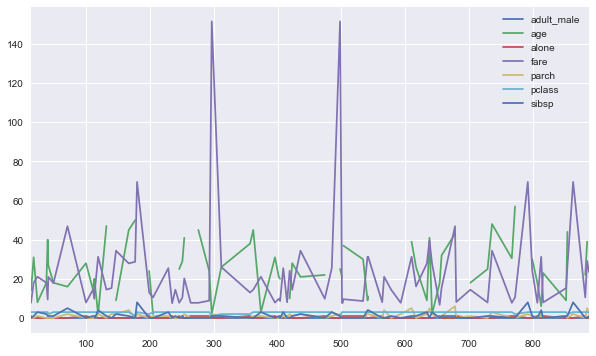

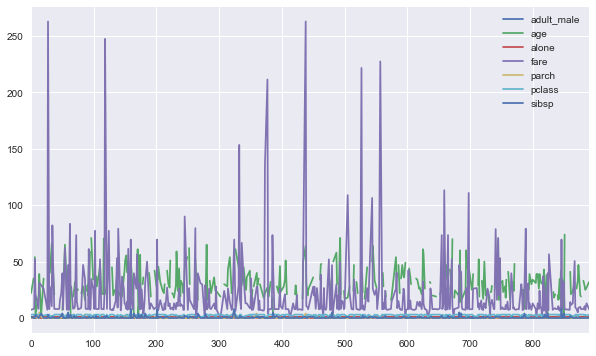

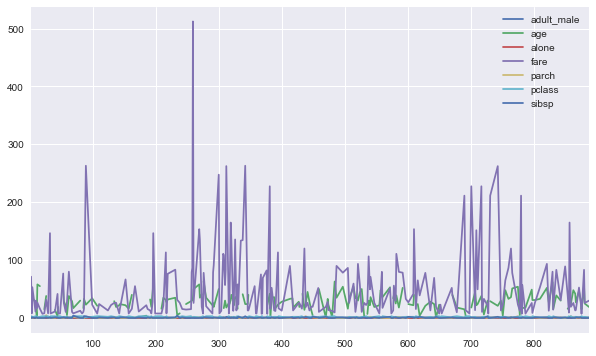

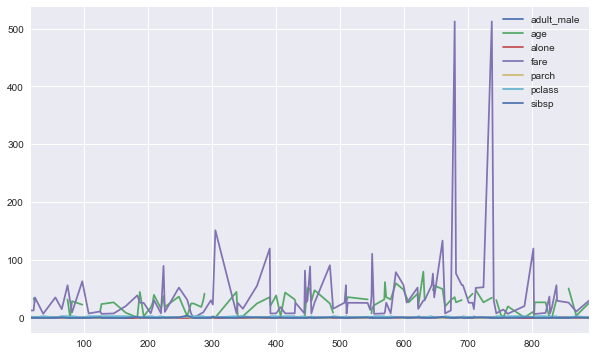

In [19]:
%matplotlib inline
# We can also plot

grouped.plot(figsize=(10,6))

## Merge, join, and concatenate

In [20]:
# Concatenate

# lets create a sample of the data
titanic_sample = titanic_df.sample(frac=0.1)
print(titanic_sample.shape, titanic_df.shape)

(89, 15) (891, 15)


In [21]:
titanic_sample

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
440,1,2,female,45.00,1,1,26.2500,S,Second,woman,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
212,0,3,male,22.00,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
414,1,3,male,44.00,0,0,7.9250,S,Third,man,True,NaN,Southampton,yes,True
393,1,1,female,23.00,1,0,113.2750,C,First,woman,False,D,Cherbourg,yes,False
629,0,3,male,NaN,0,0,7.7333,Q,Third,man,True,NaN,Queenstown,no,True
118,0,1,male,24.00,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
651,1,2,female,18.00,0,1,23.0000,S,Second,woman,False,NaN,Southampton,yes,False
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
887,1,1,female,19.00,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [22]:
# We concatenate
titanic_augmented = pd.concat([titanic_df, titanic_sample])
titanic_augmented.shape

(980, 15)

In [23]:
# it is very easy to also recopy the data multiple times
titanic_augmented = pd.concat([titanic_df]*10)
titanic_augmented.shape

(8910, 15)

In [24]:
# We can also contenate the rows

additional_cols = pd.DataFrame({"temperature": np.random.randint(0,100,size=titanic_df.shape[0]),
                                "time": pd.date_range('1/1/1811',
                                                      periods=titanic_df.shape[0],
                                                      freq='H')}).sample(frac=1)

additional_cols

,temperature,time
746,0,1811-02-01 02:00:00
136,4,1811-01-06 16:00:00
386,28,1811-01-17 02:00:00
541,62,1811-01-23 13:00:00
10,63,1811-01-01 10:00:00
661,15,1811-01-28 13:00:00
155,20,1811-01-07 11:00:00
424,37,1811-01-18 16:00:00
454,90,1811-01-19 22:00:00
886,0,1811-02-06 22:00:00


In [25]:
pd.concat([titanic_df, additional_cols], 1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,temperature,time
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,98,1811-01-01 00:00:00
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,1811-01-01 01:00:00
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,64,1811-01-01 02:00:00
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,19,1811-01-01 03:00:00
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,61,1811-01-01 04:00:00
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,9,1811-01-01 05:00:00
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,20,1811-01-01 06:00:00
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,7,1811-01-01 07:00:00
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,53,1811-01-01 08:00:00
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,56,1811-01-01 09:00:00


In [26]:
## Merging
import numpy as np
import pandas as pd
df1 = pd.DataFrame({"A": range(10), "B": range(5,15), "C": range(15,25)})
df2 = pd.DataFrame({"C": np.random.randint(0, 30, size=10),
                    "D": np.random.randint(0, 30, size=10),
                    "E": np.random.randint(0, 30, size=10)})

In [27]:
df1

,A,B,C
0,0,5,15
1,1,6,16
2,2,7,17
3,3,8,18
4,4,9,19
5,5,10,20
6,6,11,21
7,7,12,22
8,8,13,23
9,9,14,24


In [28]:
df2

,C,D,E
0,20,13,3
1,1,3,13
2,5,24,25
3,29,20,22
4,5,4,4
5,19,4,20
6,14,7,18
7,19,4,19
8,2,17,18
9,4,14,20


In [35]:
pd.merge(df1, df2, on="C", how="inner")

,A,B,C,D,E
0,4,9,19,4,20
1,4,9,19,4,19
2,5,10,20,13,3


In [36]:
df1.merge(df2, on="C", how="outer", indicator=True)

,A,B,C,D,E,_merge
0,0.0,5.0,15,NaN,NaN,left_only
1,1.0,6.0,16,NaN,NaN,left_only
2,2.0,7.0,17,NaN,NaN,left_only
3,3.0,8.0,18,NaN,NaN,left_only
4,4.0,9.0,19,4.0,20.0,both
5,4.0,9.0,19,4.0,19.0,both
6,5.0,10.0,20,13.0,3.0,both
7,6.0,11.0,21,NaN,NaN,left_only
8,7.0,12.0,22,NaN,NaN,left_only
9,8.0,13.0,23,NaN,NaN,left_only


In [39]:
# Join on index

df1 = pd.DataFrame({"A": range(10),
                    "B": range(5,15),
                    "C": range(15,25)},
                  index=range(3,13))
df2 = pd.DataFrame({"F": np.random.randint(0, 30, size=10),
                    "D": np.random.randint(0, 30, size=10),
                    "E": np.random.randint(0, 30, size=10)},
                  index=np.random.randint(0, 30, size=10))

df1.join(df2, how="inner")

,A,B,C,D,E,F
5,2,7,17,10,16,6
8,5,10,20,8,22,10
9,6,11,21,25,19,19
10,7,12,22,16,26,9
11,8,13,23,14,13,24


In [40]:
df2

,D,E,F
9,25,19,19
24,23,11,17
5,10,16,6
10,16,26,9
15,28,24,28
14,22,27,17
18,7,13,23
11,14,13,24
8,8,22,10
19,18,4,6


## Reshaping and Pivot Tables

In [42]:
titanic_df[["embark_town", "age"]]

,embark_town,age
0,Southampton,22.0
1,Cherbourg,38.0
2,Southampton,26.0
3,Southampton,35.0
4,Southampton,35.0
5,Queenstown,NaN
6,Southampton,54.0
7,Southampton,2.0
8,Southampton,27.0
9,Cherbourg,14.0


In [49]:
# pivoting 
pivoted = titanic_df.pivot(columns="embark_town", values="age")
pivoted

embark_town,nan,Cherbourg,Queenstown,Southampton
0,NaN,NaN,NaN,22.0
1,NaN,38.0,NaN,NaN
2,NaN,NaN,NaN,26.0
3,NaN,NaN,NaN,35.0
4,NaN,NaN,NaN,35.0
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,54.0
7,NaN,NaN,NaN,2.0
8,NaN,NaN,NaN,27.0
9,NaN,14.0,NaN,NaN


In [51]:
# stacking

stacked = titanic_df.stack()
stacked

0    survived                 0
     pclass                   3
     sex                   male
     age                     22
     sibsp                    1
     parch                    0
     fare                  7.25
     embarked                 S
     class                Third
     who                    man
     adult_male            True
     embark_town    Southampton
     alive                   no
     alone                False
1    survived                 1
     pclass                   1
     sex                 female
     age                     38
     sibsp                    1
     parch                    0
     fare               71.2833
     embarked                 C
     class                First
     who                  woman
     adult_male           False
     deck                     C
     embark_town      Cherbourg
     alive                  yes
     alone                False
2    survived                 1
                       ...     
888  alo

In [52]:
stacked.unstack()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.25,S,Third,man,True,None,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.925,S,Third,woman,False,None,Southampton,yes,True
3,1,1,female,35,1,0,53.1,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.05,S,Third,man,True,None,Southampton,no,True
5,0,3,male,None,0,0,8.4583,Q,Third,man,True,None,Queenstown,no,True
6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2,3,1,21.075,S,Third,child,False,None,Southampton,no,False
8,1,3,female,27,0,2,11.1333,S,Third,woman,False,None,Southampton,yes,False
9,1,2,female,14,1,0,30.0708,C,Second,child,False,None,Cherbourg,yes,False


In [53]:
# Pivot table
from itertools import product

df_xyz = pd.DataFrame(list(product(range(10), range(10))), columns=["X", "Y"])
df_xyz["Values"] = np.random.random(size=df_xyz.shape[0])
df_xyz

,X,Y,Values
0,0,0,0.589595
1,0,1,0.427708
2,0,2,0.499645
3,0,3,0.434253
4,0,4,0.251155
5,0,5,0.350577
6,0,6,0.509099
7,0,7,0.791119
8,0,8,0.279533
9,0,9,0.141380


In [56]:
pivoted = df_xyz.pivot_table(index="X",columns="Y", values="Values")
pivoted

Y,0,1,2,3,4,5,6,7,8,9
X,,,,,,,,,,
0,0.589595,0.427708,0.499645,0.434253,0.251155,0.350577,0.509099,0.791119,0.279533,0.141380
1,0.348578,0.766378,0.576112,0.479523,0.648720,0.678291,0.693394,0.794848,0.227296,0.683306
2,0.308795,0.081349,0.742841,0.996634,0.123215,0.044484,0.330976,0.164976,0.285960,0.371288
3,0.849002,0.540201,0.772710,0.238364,0.255847,0.759262,0.303780,0.788994,0.118166,0.661509
4,0.816426,0.529867,0.264385,0.052461,0.620108,0.200935,0.305569,0.369507,0.444694,0.973844
5,0.544664,0.238662,0.520776,0.502320,0.493886,0.683280,0.348055,0.469150,0.669235,0.419253
6,0.253374,0.136657,0.661577,0.699803,0.194792,0.041377,0.047644,0.403870,0.683138,0.403792
7,0.596839,0.321324,0.037654,0.935777,0.788698,0.763475,0.173898,0.431095,0.838788,0.791152
8,0.160415,0.486286,0.311478,0.877170,0.832318,0.403500,0.700195,0.603897,0.950033,0.343424


In [57]:
df_xyz.pivot(index="X",columns="Y", values="Values")

Y,0,1,2,3,4,5,6,7,8,9
X,,,,,,,,,,
0,0.589595,0.427708,0.499645,0.434253,0.251155,0.350577,0.509099,0.791119,0.279533,0.141380
1,0.348578,0.766378,0.576112,0.479523,0.648720,0.678291,0.693394,0.794848,0.227296,0.683306
2,0.308795,0.081349,0.742841,0.996634,0.123215,0.044484,0.330976,0.164976,0.285960,0.371288
3,0.849002,0.540201,0.772710,0.238364,0.255847,0.759262,0.303780,0.788994,0.118166,0.661509
4,0.816426,0.529867,0.264385,0.052461,0.620108,0.200935,0.305569,0.369507,0.444694,0.973844
5,0.544664,0.238662,0.520776,0.502320,0.493886,0.683280,0.348055,0.469150,0.669235,0.419253
6,0.253374,0.136657,0.661577,0.699803,0.194792,0.041377,0.047644,0.403870,0.683138,0.403792
7,0.596839,0.321324,0.037654,0.935777,0.788698,0.763475,0.173898,0.431095,0.838788,0.791152
8,0.160415,0.486286,0.311478,0.877170,0.832318,0.403500,0.700195,0.603897,0.950033,0.343424


In [58]:
# melt

pivoted.reset_index().melt(id_vars="X")

,X,Y,value
0,0,0,0.589595
1,1,0,0.348578
2,2,0,0.308795
3,3,0,0.849002
4,4,0,0.816426
5,5,0,0.544664
6,6,0,0.253374
7,7,0,0.596839
8,8,0,0.160415
9,9,0,0.360631


In [59]:
# This will produce an error
titanic_df.pivot(index="class", columns="embark_town", values="age")

ValueError: Index contains duplicate entries, cannot reshape

In [60]:
titanic_df.pivot_table(index="class", columns="embark_town", values="age")

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,38.027027,38.5000,38.152037
Second,22.766667,43.5000,30.386731
Third,20.741951,25.9375,25.696552


In [61]:
# We can do the same thing with crosstab

pd.crosstab(titanic_df["class"],
            titanic_df["embark_town"],
            values=titanic_df["age"],
            aggfunc="mean",
            margins=True)

embark_town,Cherbourg,Queenstown,Southampton,All
class,,,,
First,38.027027,38.500000,38.152037,38.105543
Second,22.766667,43.500000,30.386731,29.877630
Third,20.741951,25.937500,25.696552,25.140620
All,30.814769,28.089286,29.445397,29.642093


In [62]:
# Pivot_table can be use in a very similar manner than groupby

titanic_df.pivot_table(index=["survived", "class"], columns="embark_town", aggfunc="mean")

adult_male                               age             \
embark_town      Cherbourg Queenstown Southampton  Cherbourg Queenstown   
survived class                                                            
0        First    0.961538   1.000000    0.962264  43.380952  44.000000   
         Second   1.000000   1.000000    0.931818  29.500000  57.000000   
         Third    0.756098   0.711111    0.762238  26.065217  28.083333   
1        First    0.288136   0.000000    0.337838  35.905660  33.000000   
         Second   0.111111   0.000000    0.092105  16.875000  30.000000   
         Third    0.320000   0.111111    0.402985  13.940000  19.500000   

                                alone                               fare  \
embark_town     Southampton Cherbourg Queenstown Southampton   Cherbourg   
survived class                                                             
0        First    43.845238  0.615385   0.000000    0.660377   78.841981   
         Second   33.603659  0.375000   1.000000    0.727273   25.418225   
         Third    26.484716  0.707317   0.733333    0.674825    9.878361   
1        First    34.529091  0.423729   0.000000    0.418919  116.121754   
         Second   26.822027  0.333333   1.000000    0.407895   25.305100   
         Third    22.737705  0.360000   0.777778    0.582090   13.404668   

                    ...                     parch                         \
embark_town         ...     Southampton Cherbourg Queenstown Southampton   
survived class      ...                                                    
0        First      ...       57.260926  0.346154   0.000000    0.283019   
         Second     ...       18.946591  0.375000   0.000000    0.125000   
         Third      ...       14.529906  0.170732   0.288889    0.430070   
1        First      ...       79.750114  0.305085   0.000000    0.472973   
         Second     ...       21.926316  0.666667   0.000000    0.657895   
         Third      ...       15.131464  0.720000   0.000000    0.477612   

                   pclass                            sibsp             \
embark_town     Cherbourg Queenstown Southampton Cherbourg Queenstown   
survived class                                                          
0        First        1.0        1.0         1.0  0.153846   2.000000   
         Second       2.0        2.0         2.0  0.625000   0.000000   
         Third        3.0        3.0         3.0  0.243902   0.488889   
1        First        1.0        1.0         1.0  0.474576   1.000000   
         Second       2.0        2.0         2.0  0.555556   0.000000   
         Third        3.0        3.0         3.0  0.520000   0.296296   

                             
embark_town     Southampton  
survived class               
0        First     0.320755  
         Second    0.295455  
         Third     0.762238  
1        First     0.513514  
         Second    0.500000  
         Third     0.462687  

[6 rows x 21 columns]

In [63]:
titanic_df.groupby(["survived", "class", "embark_town"]).mean()

pclass        age     sibsp     parch  \
survived class  embark_town                                          
0        First  Cherbourg       1.0  43.380952  0.153846  0.346154   
                Queenstown      1.0  44.000000  2.000000  0.000000   
                Southampton     1.0  43.845238  0.320755  0.283019   
         Second Cherbourg       2.0  29.500000  0.625000  0.375000   
                Queenstown      2.0  57.000000  0.000000  0.000000   
                Southampton     2.0  33.603659  0.295455  0.125000   
         Third  Cherbourg       3.0  26.065217  0.243902  0.170732   
                Queenstown      3.0  28.083333  0.488889  0.288889   
                Southampton     3.0  26.484716  0.762238  0.430070   
1        First  Cherbourg       1.0  35.905660  0.474576  0.305085   
                Queenstown      1.0  33.000000  1.000000  0.000000   
                Southampton     1.0  34.529091  0.513514  0.472973   
         Second Cherbourg       2.0  16.875000  0.555556  0.666667   
                Queenstown      2.0  30.000000  0.000000  0.000000   
                Southampton     2.0  26.822027  0.500000  0.657895   
         Third  Cherbourg       3.0  13.940000  0.520000  0.720000   
                Queenstown      3.0  19.500000  0.296296  0.000000   
                Southampton     3.0  22.737705  0.462687  0.477612   

                                   fare  adult_male     alone  
survived class  embark_town                                    
0        First  Cherbourg     78.841981    0.961538  0.615385  
                Queenstown    90.000000    1.000000  0.000000  
                Southampton   57.260926    0.962264  0.660377  
         Second Cherbourg     25.418225    1.000000  0.375000  
                Queenstown    12.350000    1.000000  1.000000  
                Southampton   18.946591    0.931818  0.727273  
         Third  Cherbourg      9.878361    0.756098  0.707317  
                Queenstown    11.654167    0.711111  0.733333  
                Southampton   14.529906    0.762238  0.674825  
1        First  Cherbourg    116.121754    0.288136  0.423729  
                Queenstown    90.000000    0.000000  0.000000  
                Southampton   79.750114    0.337838  0.418919  
         Second Cherbourg     25.305100    0.111111  0.333333  
                Queenstown    12.350000    0.000000  1.000000  
                Southampton   21.926316    0.092105  0.407895  
         Third  Cherbourg     13.404668    0.320000  0.360000  
                Queenstown    10.398770    0.111111  0.777778  
                Southampton   15.131464    0.402985  0.582090

## Questions: What category we better be in?

In [64]:
titanic_df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [73]:
some_columns = titanic_df.drop(["alive"], 1).select_dtypes(include=[object, "category"]).columns

titanic_df.groupby(list(set(some_columns) - set("survived")))["survived"].mean().sort_values(ascending=False)

class   who    sex     embarked  deck  embark_town
First   woman  female  Q         C     Queenstown     1.000000
Second  child  male    S         F     Southampton    1.000000
First   child  male    S         A     Southampton    1.000000
                                 B     Southampton    1.000000
                                 C     Southampton    1.000000
        man    male    C         E     Cherbourg      1.000000
        woman  female  C         A     Cherbourg      1.000000
                                 B     Cherbourg      1.000000
                                 D     Cherbourg      1.000000
                                 E     Cherbourg      1.000000
Third   woman  female  S         E     Southampton    1.000000
First   woman  female  S         B     Southampton    1.000000
                                 D     Southampton    1.000000
                                 E     Southampton    1.000000
Second  child  female  S         F     Southampton    1.000000
Firs